# Viewing COSP ice_bug output

May try to port the SatComp metric over to the data format if possible.

### Add paths to run locally or off Cheyenne or Casper 
(what is the difference between these two again?)

In [8]:
import sys
# Add common resources folder to path
sys.path.append('/glade/u/home/jonahshaw/Scripts/git_repos/CESM2_analysis')
sys.path.append('/glade/u/home/jonahshaw/Scripts/git_repos/CESM2_analysis/Common/')
# sys.path.append("/home/jonahks/git_repos/netcdf_analysis/Common/")

from imports import (
    pd, np, xr, mpl, plt, sns, os, 
    datetime, sys, crt, gridspec,
    ccrs, metrics, Iterable
    )

from functions import (
    masked_average, add_weights, sp_map,
    season_mean, get_dpm, leap_year, share_ylims,
    to_png
    )

from classes import SatComp_Metric, CT_SLF_Metric
from cloud_metric import Model_case, Cloud_Metric
from collections import deque
%matplotlib inline

### Check running location and adjust working directory appropriately.

In [22]:
host = os.uname()[1]
if 'jupyter' in host.split('-'): # Check if running on NIRD through the Jupyter Hub
    print('Running through MC2 Jupyter Hub')
    model_dir = '/mnt/mcc-ns9600k/jonahks/'
    os.chdir(model_dir)
    
if 'casper' in host: # Check if running on NIRD through the Jupyter Hub
    print('Running through CISL Casper')
    model_dir = '/glade/p/cesm/pcwg/jenkay/COSP/'
    os.chdir(model_dir)

else:  # Assume that we're running on a local machine and mounting NIRD
    print('Running on %s, attempting to mount ns9600k/jonahks/ from NIRD' % str(host))
    os.system('fusermount -zu ~/drivemount/')  # unmount first
    os.system('sshfs jonahks@login.nird.sigma2.no:"p/jonahks/" ~/drivemount/')    # Calling mountnird from .bashrc doesn't work
    os.chdir('/home/jonahks/drivemount/')
    save_dir = '~/DATAOUT/'
    save_to = os.path.expanduser(save_dir)

output_dir = '/glade/u/home/jonahshaw/figures/'
case_dir = '/glade/p/cesm/pcwg/jenkay/COSP/cesm21/'
obs_dir = '/glade/work/jenkay/obs/COSP/'

# Check that each important directory can be accessed:    
access_paths = os.path.exists(output_dir) and os.path.exists(case_dir) #and os.path.exists(conv_dir)
print('Can access all directory paths:', access_paths)

Running through CISL Casper
Can access all directory paths: True


In [6]:
os.chdir(case_dir)

In [23]:
os.listdir(obs_dir)

['CERES',
 'CLOUDSAT',
 'readme_obs4COSP.txt',
 'readme_obs4COSP.txt~',
 'CALIPSO',
 'MISR',
 'ISCCP',
 'MODIS']

In [9]:
new_metric = Cloud_Metric(casedir=case_dir)

Loading GOCCP data...Could not find GOCCP directory GOCCP_data/2Ddata/f19_tn14_interpolation/
Loading CALIOP SLFs...Could not load cloudtop CALIOP slfs from caliop_olimpia/ct_slf_olimpia/cloudtop_slfs.nc
Loading CERES-EBAF fluxes...Failed to load CERES-EBAF data.


In [11]:
ds = xr.open_dataset('cesm2p1_B1850_COSP2_lidarphasefix/atm/hist/cesm2p1_B1850_COSP2_lidarphasefix.cam.h0.0001-08.nc')

In [16]:
ds['time']

<xarray.DataArray 'time' (time: 1)>
array([cftime.DatetimeNoLeap(1, 9, 1, 0, 0, 0, 0)], dtype=object)
Coordinates:
  * time     (time) object 0001-09-01 00:00:00
Attributes:
    long_name:  time
    bounds:     time_bnds

In [18]:
ds['time_bnds'].isel(nbnd=0)

<xarray.DataArray 'time_bnds' (time: 1)>
array([cftime.DatetimeNoLeap(1, 8, 1, 0, 0, 0, 0)], dtype=object)
Coordinates:
  * time     (time) object 0001-09-01 00:00:00
Attributes:
    long_name:  time interval endpoints

In [20]:
new_metric.add_case('cesm2p1_B1850_COSP2_lidarphasefix',label='Lidar Phase Fix')

Trying to load concatenated file for cesm2p1_B1850_COSP2_lidarphasefix
Failed, using xr.open_mfdataset.
cesm2p1_B1850_COSP2_lidarphasefix load successfully.


AttributeError: 'Cloud_Metric' object has no attribute 'goccp_data'

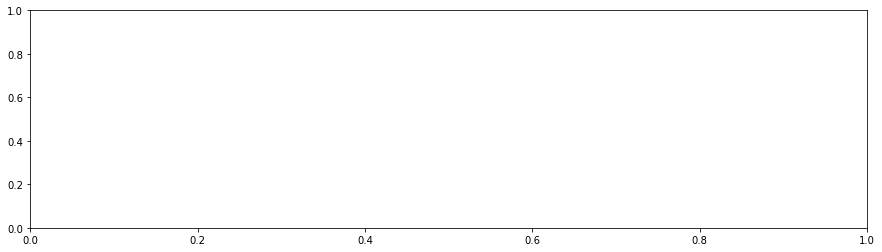

In [21]:
new_metric.plot_cloud_sum()